In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
X = data.drop(columns=['Class'])
Y = data['Class'] 

In [5]:
X.shape , Y.shape

((284807, 30), (284807,))

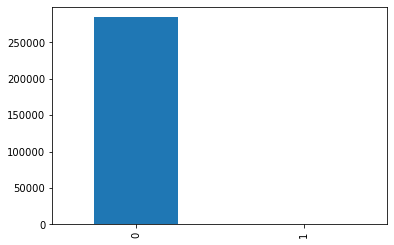

In [11]:
Y.value_counts().plot.bar()
plt.show()

- here we can see that dependent variable have binary categories '1' and '0' but as we can see yes have more data than no so it is a imbalanced dataset
- we need to balanced it by using under-sampling
- under sampling take random data from '0' categories
- because '0' category have more no. of data then '1'
- take random data from '0' as data present in '1'
- ex: 0(normal) = 284315 and 1(froud) = 492
- it will take random 492 data from 0(normal) 
- so  now 0(normal) heve 492 data and 1(froud) data is as it is 492
- total no. of data set is 492 + 492 = 984 
- now we have balanced data

In [12]:
Y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

- get a froud and normal data
- feaching data for 1 and 0 saparately and create new datasets

In [13]:
froud = data[data['Class'] == 1]
normal = data[data['Class'] == 0]

In [14]:
froud.shape, normal.shape

((492, 31), (284315, 31))

In [17]:
froud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


- import neccesary library for under sampling

In [28]:
from imblearn.under_sampling import NearMiss

In [32]:
nm = NearMiss()

In [33]:
X_im, Y_im = nm.fit_sample(X,Y)

In [35]:
X_im.shape, Y_im.shape   # data is balanced

((984, 30), (984,))

In [36]:
from collections import Counter

In [41]:
print("Imbalanced Data: ",Counter(Y))
print("Balanced Data: ",Counter(Y_im))

Imbalanced Data:  Counter({0: 284315, 1: 492})
Balanced Data:  Counter({0: 492, 1: 492})


- use X_im and Y_im insted of X and Y  for building the model

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train, x_test, y_train, y_test = train_test_split(X_im,Y_im,test_size=0.2,random_state=0)

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
lr = LogisticRegression()

In [75]:
lr.fit(x_train,y_train)

LogisticRegression()

In [76]:
y_pred = lr.predict(x_test)

In [77]:
from sklearn.metrics import accuracy_score

In [79]:
accuracy_score(y_pred,y_test)

0.9187817258883249

## K-fold cross validation

In [80]:
from sklearn.model_selection import cross_val_score

In [82]:
score = cross_val_score(lr, X_im , Y_im , cv=5)

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

In [83]:
score

array([0.97461929, 0.95431472, 0.95431472, 0.96446701, 0.90816327])

In [84]:
score.mean()

0.9511758002693462